## Observations and Insights 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
fullData = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
fullData.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice.
mouseCount =  fullData['Mouse ID'].nunique()
print(mouseCount)

249


In [83]:
# Get the duplicated mice by ID number that shows up for Mouse ID and Timepoint. 
dupMice = fullData[fullData.duplicated(['Mouse ID', "Timepoint"])]
dupMice.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dupMice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMice = fullData.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleanMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [86]:
# Checking the number of mice in the clean DataFrame.
mouseCount =  cleanMice['Mouse ID'].nunique()
print(mouseCount)

249


## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regGrp = cleanMice.groupby("Drug Regimen")
regGrp.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regrpDl = {"Tumor Volume Mean":regGrp["Tumor Volume (mm3)"].mean(),\
           "Tumor Volume Median":regGrp["Tumor Volume (mm3)"].median(),\
        "Tumor Volume Variance":regGrp["Tumor Volume (mm3)"].var(),\
          "Tumor Volume Standard Deviation":regGrp["Tumor Volume (mm3)"].std(),\
          "Tumor Volume SEM":regGrp["Tumor Volume (mm3)"].sem()}

# Assemble the resulting series into a single summary dataframe.
grpsDf = pd.DataFrame(data=regrpDl)





In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grpsDf.head(10)
# Using the aggregation method, produce the same summary statistics in a single line
cleanMice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median', 'var','std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:ylabel='Drug Regimen'>

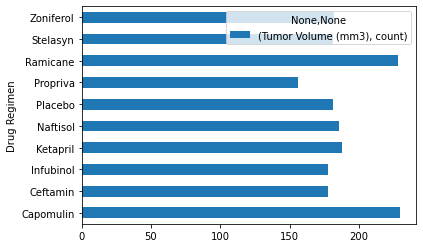

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
countPlt = cleanMice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['count']})
countPlt.plot.barh(rot=0)


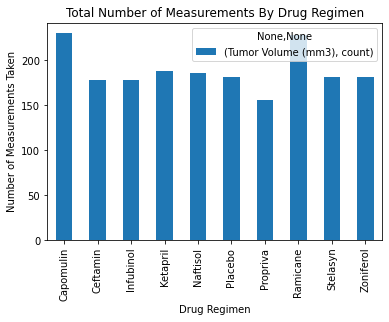

In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
ttlMeasurchart = countPlt.plot(kind="bar", title="Total Number of Measurements By Drug Regimen")
ttlMeasurchart.set_xlabel("Drug Regimen")
ttlMeasurchart.set_ylabel("Number of Measurements Taken")
plt.show()


array([<AxesSubplot:ylabel='(Sex, count)'>], dtype=object)

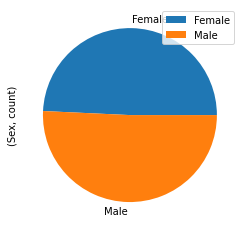

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexPlt = cleanMice.groupby('Sex').agg({'Sex':['count']})
sexPlt.plot.pie(subplots=True)


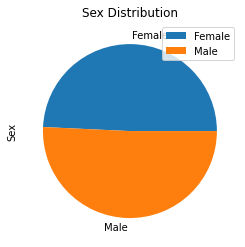

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexChrt = sexPlt.plot(kind="pie", y="Sex", title="Sex Distribution")
sexChrt.set_ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
msMax = cleanMice.groupby('Mouse ID').agg({'Timepoint':['max']})

#msMax.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxDf = msMax.merge(cleanMice, on="Mouse ID", how="inner")
# I spent a while researching different merge techniques when I realized I could drop all but last row of each mouse.
maxDf = maxDf.drop_duplicates(subset=['Mouse ID'], keep='last')
maxDf.head()


/Users/tourtoiseshell/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Mouse ID,"(Timepoint, max)",Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1


In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tmrVolumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drugUsed = maxDf.loc[maxDf["Drug Regimen"]==t]
    # add subset 
    tmrVolumes.append(drugUsed["Tumor Volume (mm3)"])
    # Determine outliers using upper and lower bounds
    qs = drugUsed["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lq = qs[.25]
    uq = qs[.75]
    print(f"upper Q{round(lq, 2)}")
    print(f"upper Q{round(uq, 2)}")
    interRange = uq-lq
    print(f"inter range{interRange}")
    
    lowerB= lq-(1.5*interRange)
    upperB= uq+(1.5*interRange)
    print(f"upper bound{upperB} lower bound{lowerB}")
    outliers = drugUsed.loc[(drugUsed['Tumor Volume (mm3)']<lowerB) | (drugUsed['Tumor Volume (mm3)']>upperB)]
    print(f"Outliers{outliers}")

    

upper Q32.38
upper Q40.16
inter range7.781863460000004
upper bound51.83201549 lower bound20.70456164999999
OutliersEmpty DataFrame
Columns: [Mouse ID, (Timepoint, max), Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
upper Q31.56
upper Q40.66
inter range9.098536719999998
upper bound54.30681135 lower bound17.912664470000003
OutliersEmpty DataFrame
Columns: [Mouse ID, (Timepoint, max), Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
upper Q54.05
upper Q65.53
inter range11.477135160000003
upper bound82.74144559000001 lower bound36.83290494999999
Outliers    Mouse ID  (Timepoint, max) Drug Regimen     Sex  Age_months  Weight (g)  \
275     c326                 5    Infubinol  Female          18          25   

     Timepoint  Tumor Volume (mm3)  Metastatic Sites  
275          5           36.321346                 0  
upper Q48.72
upper Q64.3
inter range15.577752179999997
upper bound

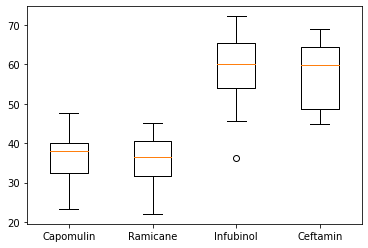

In [113]:
#Here I am actually showing the box plot 
plt.boxplot(tmrVolumes, labels = treatments)
plt.show()

## Line and Scatter Plots

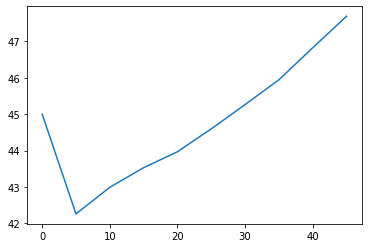

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleanMice.loc[cleanMice["Mouse ID"]=="i557"]
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])


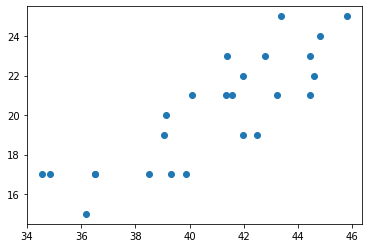

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drgMouse = cleanMice.loc[cleanMice["Drug Regimen"]=="Capomulin"]
plt.scatter(drgMouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean(), drgMouse.groupby('Mouse ID')['Weight (g)'].mean())
plt.show()

## Correlation and Regression

In [18]:
#Sorry I ran out of time this week. 
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

